In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
def generate_full_names(num_names):
    """
    Generates a list of random full names.

    Args:
        num_names (int): The number of full names to generate.

    Returns:
        list: A list of randomly generated full names.
    """
    first_names = [ "Ali", "Zahra","Reza","Sara", "Mohammad","Fatemeh","Hossein", "Maryam","Mehdi","Narges","Hamed","Roya","Bahram","Roze","Samin","Sogol","sahar","Ahmad","Raha","Hakan" ]
    last_names = ["Ahmadi","Hosseini", "Karimi", "Rahimi","Hashemi","Ebrahimi", "Moradi", "Mohammadi","Rostami","Fazeli","Hosseinzadeh", "Niknam","Lotfi","Rajabi","Rasoli","Safari","Sadeghi","Safavi","Mehrzad","Ahmadzadeh"  ]

    random.seed(0)
    full_names = set()
    while len(full_names) < num_names:
        full_name = random.choice(first_names) + " " + random.choice(last_names)
        full_names.add(full_name)
    return list(full_names)

full_names = generate_full_names(400)
print(full_names)

['Sogol Safavi', 'sahar Ahmadzadeh', 'Mehdi Ebrahimi', 'Roya Mohammadi', 'Roya Hosseinzadeh', 'Hamed Ebrahimi', 'Roze Mohammadi', 'Hossein Ahmadzadeh', 'Sara Moradi', 'Sogol Safari', 'Sogol Niknam', 'Sara Mohammadi', 'Raha Safari', 'Mohammad Hosseini', 'Narges Ahmadzadeh', 'sahar Hashemi', 'Hamed Lotfi', 'Mehdi Sadeghi', 'Raha Moradi', 'Maryam Rasoli', 'Samin Safavi', 'Raha Sadeghi', 'Samin Rajabi', 'Ali Fazeli', 'Roya Mehrzad', 'Fatemeh Mehrzad', 'Samin Mehrzad', 'Bahram Karimi', 'Hossein Hosseini', 'Mohammad Niknam', 'Raha Fazeli', 'sahar Karimi', 'Sara Ahmadzadeh', 'sahar Hosseini', 'Narges Karimi', 'Bahram Ebrahimi', 'Sara Rasoli', 'Maryam Sadeghi', 'Ahmad Ahmadzadeh', 'Zahra Mohammadi', 'Hamed Rostami', 'Narges Hosseini', 'Hossein Rostami', 'Maryam Lotfi', 'Hakan Rahimi', 'Hamed Safari', 'Roya Rajabi', 'Samin Ahmadzadeh', 'Narges Fazeli', 'Sogol Lotfi', 'Hakan Fazeli', 'Roya Hashemi', 'Raha Hashemi', 'Fatemeh Karimi', 'Bahram Lotfi', 'Ali Safavi', 'Roya Rahimi', 'Hamed Sadeghi', '

In [ ]:
def group_create(names, group_size):
    """
    Groups the names into groups of specified size.

    Args:
        names (list): List of names to be grouped.
        group_size (int): Size of each group.

    Returns:
        list: List of groups, each containing a list of names.
        list: List of groups, each containing a list of indices.
    """
    indices = list(range(len(names)))
    combined = list(zip(names, indices))

    random.shuffle(combined)
    shuffled_names, shuffled_indices = zip(*combined)

    groups_name = [list(shuffled_names[i:i + group_size]) for i in range(0, len(names), group_size)]
    groups_number = [list(shuffled_indices[i:i + group_size]) for i in range(0, len(names), group_size)]

    return groups_name, groups_number

# Generate full names
full_names = generate_full_names(400)

# Group names into groups of 5
groups_name, groups_number = group_create(full_names, 5)

# Print groups
for i, (group_names, group_numbers) in enumerate(zip(groups_name, groups_number)):
    print(f"Group {i + 1}: Names = {group_names}, Numbers = {group_numbers}")

Group 1: Names = ['Hossein Moradi', 'Zahra Safari', 'Sara Mohammadi', 'Mohammad Hosseinzadeh', 'Sogol Rasoli'], Numbers = [165, 280, 11, 106, 155]
Group 2: Names = ['Samin Safari', 'Raha Rahimi', 'Mehdi Hosseinzadeh', 'Roya Rasoli', 'Ahmad Rostami'], Numbers = [63, 170, 199, 279, 285]
Group 3: Names = ['sahar Lotfi', 'Roze Rasoli', 'Maryam Safavi', 'Reza Ahmadi', 'Bahram Hosseini'], Numbers = [202, 200, 355, 171, 156]
Group 4: Names = ['Roya Ahmadzadeh', 'Bahram Mehrzad', 'Raha Ahmadzadeh', 'Raha Niknam', 'Ahmad Hosseinzadeh'], Numbers = [344, 360, 75, 220, 176]
Group 5: Names = ['Maryam Moradi', 'Roya Sadeghi', 'Ali Rahimi', 'Fatemeh Lotfi', 'Samin Hosseinzadeh'], Numbers = [372, 230, 117, 64, 274]
Group 6: Names = ['Mohammad Safavi', 'Sara Rahimi', 'Zahra Hosseini', 'Samin Ahmadi', 'sahar Rahimi'], Numbers = [221, 164, 231, 190, 303]
Group 7: Names = ['sahar Hosseinzadeh', 'Mohammad Moradi', 'Hamed Hashemi', 'Ahmad Fazeli', 'Bahram Safavi'], Numbers = [148, 152, 327, 82, 123]
Group 8

In [ ]:
groups_number

[[165, 280, 11, 106, 155],
 [63, 170, 199, 279, 285],
 [202, 200, 355, 171, 156],
 [344, 360, 75, 220, 176],
 [372, 230, 117, 64, 274],
 [221, 164, 231, 190, 303],
 [148, 152, 327, 82, 123],
 [185, 62, 162, 20, 198],
 [193, 218, 379, 207, 345],
 [145, 42, 255, 293, 352],
 [10, 167, 182, 39, 183],
 [140, 105, 281, 234, 44],
 [110, 368, 257, 121, 25],
 [66, 296, 291, 196, 120],
 [396, 58, 323, 29, 114],
 [262, 315, 147, 295, 337],
 [343, 225, 251, 177, 201],
 [3, 15, 273, 159, 354],
 [206, 321, 138, 308, 84],
 [132, 86, 57, 124, 297],
 [54, 173, 395, 382, 38],
 [265, 256, 175, 172, 21],
 [217, 393, 227, 399, 70],
 [371, 100, 236, 325, 115],
 [228, 319, 134, 294, 109],
 [103, 43, 244, 49, 386],
 [292, 137, 17, 53, 48],
 [215, 364, 96, 351, 33],
 [61, 277, 248, 99, 363],
 [210, 178, 6, 87, 328],
 [89, 50, 113, 377, 129],
 [213, 260, 362, 204, 118],
 [55, 389, 160, 258, 97],
 [348, 73, 22, 141, 219],
 [158, 271, 45, 334, 18],
 [287, 306, 304, 249, 19],
 [52, 56, 85, 125, 392],
 [1, 71, 194,

In [ ]:
def get_matrix_conflicts(num_people: int, max_conflicts: int, group_numbers):
    """
    Generates a matrix representing conflicts between people.

    Args:
        num_people (int): The number of people.
        max_conflicts (int): The maximum number of conflicts to generate.
        group_numbers (list): List of groups with their member indices.

    Returns:
        torch.Tensor: A matrix representing conflicts between people.
    """
    matrix_conflicts = torch.zeros(num_people, num_people)

    count_one = 0
    while count_one < max_conflicts:
        i, j = random.sample(range(num_people), 2)
        same_group = False
        for group in group_numbers:
            if i in group and j in group:
                same_group = True
                break

        if not same_group and matrix_conflicts[i][j] == 0:
            matrix_conflicts[i][j] = 1
            count_one += 1
            print(f"i: {i}, j: {j}")

    return matrix_conflicts.float()

# Set print options for better output display
torch.set_printoptions(precision=0, linewidth=150)

# Call the function to generate the matrix
incompatible_pairs = get_matrix_conflicts(num_people=400, max_conflicts=600, group_numbers=groups_number)

print(incompatible_pairs)

i: 260, j: 240
i: 248, j: 198
i: 137, j: 334
i: 384, j: 232
i: 173, j: 314
i: 312, j: 278
i: 334, j: 324
i: 50, j: 389
i: 87, j: 294
i: 344, j: 333
i: 369, j: 335
i: 20, j: 229
i: 248, j: 245
i: 136, j: 217
i: 115, j: 390
i: 375, j: 377
i: 167, j: 195
i: 248, j: 120
i: 310, j: 300
i: 11, j: 273
i: 321, j: 102
i: 290, j: 398
i: 171, j: 99
i: 354, j: 79
i: 150, j: 273
i: 274, j: 358
i: 93, j: 223
i: 318, j: 54
i: 358, j: 131
i: 196, j: 111
i: 32, j: 315
i: 189, j: 203
i: 76, j: 395
i: 346, j: 210
i: 274, j: 250
i: 53, j: 135
i: 216, j: 182
i: 187, j: 393
i: 204, j: 182
i: 388, j: 210
i: 343, j: 133
i: 3, j: 106
i: 234, j: 187
i: 109, j: 47
i: 162, j: 6
i: 192, j: 214
i: 104, j: 300
i: 217, j: 127
i: 333, j: 322
i: 374, j: 356
i: 329, j: 341
i: 214, j: 162
i: 59, j: 8
i: 106, j: 325
i: 152, j: 38
i: 109, j: 154
i: 43, j: 104
i: 81, j: 120
i: 294, j: 356
i: 396, j: 222
i: 326, j: 166
i: 150, j: 80
i: 123, j: 332
i: 266, j: 252
i: 3, j: 384
i: 67, j: 248
i: 328, j: 318
i: 33, j: 1
i: 157, j

In [ ]:
incompatible_pairs.shape

torch.Size([400, 400])

In [ ]:
def group_conflict_matrix(groups_number, conflict_matrix):
    """
    Generates a matrix representing conflicts between groups.

    Args:
        groups_number (list): List of groups with their member indices.
        conflict_matrix (torch.Tensor): A matrix representing conflicts between people.

    Returns:
        torch.Tensor: A matrix representing conflicts between groups.
    """
    num_groups = len(groups_number)
    group_conflicts = torch.zeros(num_groups, num_groups)
    xs, ys = [], []

    for i, group1 in enumerate(groups_number):
        for j, group2 in enumerate(groups_number):
            if i != j:
                conflicts = 0
                for member1 in group1:
                    for member2 in group2:
                        conflicts += conflict_matrix[member1, member2]
                group_conflicts[i, j] = conflicts
                if conflicts > 0:
                  print(f"i: {i+1}, j: {j+1}")
                else:
                  xs.append(i)
                  ys.append(j)

    return group_conflicts, xs, ys

# Generate the group-to-group conflict matrix
group_conflicts, xs, ys = group_conflict_matrix(groups_number, incompatible_pairs)

print(group_conflicts)

i: 1, j: 12
i: 1, j: 18
i: 1, j: 24
i: 1, j: 39
i: 1, j: 43
i: 1, j: 64
i: 2, j: 1
i: 2, j: 14
i: 2, j: 32
i: 2, j: 44
i: 2, j: 45
i: 2, j: 61
i: 2, j: 64
i: 3, j: 9
i: 3, j: 11
i: 3, j: 13
i: 3, j: 22
i: 3, j: 23
i: 3, j: 29
i: 3, j: 37
i: 3, j: 64
i: 3, j: 72
i: 3, j: 76
i: 4, j: 2
i: 4, j: 14
i: 4, j: 20
i: 4, j: 21
i: 4, j: 34
i: 4, j: 47
i: 4, j: 72
i: 4, j: 78
i: 5, j: 2
i: 5, j: 3
i: 5, j: 7
i: 5, j: 9
i: 5, j: 19
i: 5, j: 51
i: 5, j: 70
i: 5, j: 72
i: 5, j: 77
i: 5, j: 78
i: 6, j: 1
i: 6, j: 13
i: 6, j: 29
i: 6, j: 30
i: 6, j: 46
i: 6, j: 51
i: 6, j: 57
i: 6, j: 58
i: 6, j: 63
i: 6, j: 65
i: 6, j: 66
i: 6, j: 72
i: 6, j: 73
i: 6, j: 77
i: 7, j: 9
i: 7, j: 18
i: 7, j: 21
i: 7, j: 30
i: 7, j: 47
i: 7, j: 54
i: 7, j: 64
i: 7, j: 65
i: 7, j: 74
i: 7, j: 78
i: 8, j: 23
i: 8, j: 27
i: 8, j: 30
i: 8, j: 58
i: 8, j: 75
i: 9, j: 15
i: 9, j: 20
i: 9, j: 21
i: 10, j: 37
i: 11, j: 16
i: 11, j: 24
i: 11, j: 29
i: 11, j: 43
i: 11, j: 44
i: 11, j: 79
i: 12, j: 9
i: 12, j: 10
i: 12, j: 26
i: 1

In [ ]:
group_conflicts.shape

torch.Size([80, 80])

In [ ]:
group_conflicts[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Function to count zeros in each group
def count_zeros_per_group(group_conflicts):
    zero_counts = {}
    for i, group in enumerate(group_conflicts):
        zero_count = (group == 0).sum().item()
        zero_counts[i + 1] = zero_count
    return zero_counts

# Calculate the number of zeros for each group
zero_counts = count_zeros_per_group(group_conflicts)

# Display the result
print(zero_counts)

{1: 74, 2: 73, 3: 70, 4: 72, 5: 70, 6: 66, 7: 70, 8: 75, 9: 77, 10: 79, 11: 74, 12: 70, 13: 75, 14: 74, 15: 71, 16: 75, 17: 75, 18: 69, 19: 75, 20: 71, 21: 76, 22: 72, 23: 75, 24: 71, 25: 71, 26: 72, 27: 71, 28: 75, 29: 72, 30: 73, 31: 73, 32: 73, 33: 72, 34: 77, 35: 73, 36: 74, 37: 76, 38: 76, 39: 74, 40: 76, 41: 74, 42: 77, 43: 74, 44: 70, 45: 72, 46: 74, 47: 69, 48: 78, 49: 73, 50: 74, 51: 73, 52: 70, 53: 72, 54: 71, 55: 73, 56: 74, 57: 75, 58: 74, 59: 74, 60: 72, 61: 71, 62: 68, 63: 70, 64: 74, 65: 73, 66: 76, 67: 69, 68: 73, 69: 69, 70: 74, 71: 69, 72: 73, 73: 72, 74: 72, 75: 74, 76: 71, 77: 74, 78: 71, 79: 75, 80: 76}


In [ ]:
# Sort the dictionary by values ​​from largest to smallest
sorted_groups = sorted(zero_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the number of groups sorted in a list
sorted_group_numbers = [group[0] for group in sorted_groups]

# Display the result
print(sorted_group_numbers)

[10, 48, 9, 34, 42, 21, 37, 38, 40, 66, 80, 8, 13, 16, 17, 19, 23, 28, 57, 79, 1, 11, 14, 36, 39, 41, 43, 46, 50, 56, 58, 59, 64, 70, 75, 77, 2, 30, 31, 32, 35, 49, 51, 55, 65, 68, 72, 4, 22, 26, 29, 33, 45, 53, 60, 73, 74, 15, 20, 24, 25, 27, 54, 61, 76, 78, 3, 5, 7, 12, 44, 52, 63, 18, 47, 67, 69, 71, 62, 6]


In [ ]:
number_group_list = list(range(1, 81))
print(number_group_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [ ]:
# shuffle up the group
random.seed(42)
random.shuffle(number_group_list)
print(number_group_list)

[50, 64, 24, 51, 31, 56, 9, 47, 58, 40, 16, 73, 60, 39, 43, 63, 26, 57, 77, 2, 71, 54, 19, 68, 20, 21, 44, 48, 34, 62, 33, 8, 66, 3, 17, 37, 23, 41, 25, 6, 7, 61, 74, 10, 53, 22, 67, 59, 11, 49, 1, 52, 75, 38, 76, 80, 27, 35, 45, 42, 46, 13, 78, 69, 65, 30, 28, 72, 79, 5, 55, 12, 70, 14, 18, 29, 32, 36, 4, 15]


In [ ]:
zero_counts[1]

74

In [ ]:

block_size = 80  # context length: how many numbers are used to predict the next number
def build_dataset(numbers):
    X, Y = [], []

    for num in numbers:
        context = [0] * block_size

        if num in sorted_group_numbers:
              index_num = sorted_group_numbers.index(num)

        for i in range(len(sorted_group_numbers)):

          if index_num+i == len(sorted_group_numbers):
            index = 0
          if index_num+i < len(sorted_group_numbers):
            index = index_num+i
          if index_num+i > len(sorted_group_numbers) :
            index += 1

          ix = sorted_group_numbers[index]
          X.append(context)
          Y.append(ix)
          context = context[1:] + [ix]



    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

# Split the data into training, validation and testing sets
n1 = int(0.8 * len(number_group_list))
n2 = int(0.9 * len(number_group_list))
Xtr, Ytr = build_dataset(number_group_list[:n1])     # 80%
Xdev, Ydev = build_dataset(number_group_list[n1:n2]) # 10%
Xte, Yte = build_dataset(number_group_list[n2:])     # 10%

# Display the shape of the data
print(Xtr.shape, Ytr.shape)
print(Xdev.shape, Ydev.shape)
print(Xte.shape, Yte.shape)

torch.Size([5120, 80]) torch.Size([5120])
torch.Size([640, 80]) torch.Size([640])
torch.Size([640, 80]) torch.Size([640])
torch.Size([5120, 80]) torch.Size([5120])
torch.Size([640, 80]) torch.Size([640])
torch.Size([640, 80]) torch.Size([640])


In [ ]:
Xtr

tensor([[ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0, 50],
        [ 0,  0,  0,  ...,  0, 50, 56],
        ...,
        [ 0,  0,  0,  ..., 44, 52, 63],
        [ 0,  0, 69,  ..., 52, 63, 18],
        [ 0, 69, 71,  ..., 63, 18, 47]])

In [ ]:
Xtr[79]

tensor([ 0, 50, 56, 58, 59, 64, 70, 75, 77,  2, 30, 31, 32, 35, 49, 51, 55, 65, 68, 72,  4, 22, 26, 29, 33, 45, 53, 60, 73, 74, 15, 20, 24, 25, 27,
        54, 61, 76, 78,  3,  5,  7, 12, 44, 52, 63, 18, 47, 67, 69, 71, 62,  6, 10, 48,  9, 34, 42, 21, 37, 38, 40, 66, 80,  8, 13, 16, 17, 19, 23,
        28, 57, 79,  1, 11, 14, 36, 39, 41, 43])

In [ ]:
Ytr[79]

tensor(46)

In [ ]:
Xtr.shape

torch.Size([5120, 80])

In [ ]:
5120/80

64.0

In [ ]:
number = 0
for x, y in zip(Xtr[:80], Ytr[:80]):

    x_str = ''.join(str(ix.item()) for ix in x)
    y_str = str(y.item())
    print(number)
    print(x_str, '-->', y_str)
    number += 1

0
00000000000000000000000000000000000000000000000000000000000000000000000000000000 --> 50
1
000000000000000000000000000000000000000000000000000000000000000000000000000000050 --> 56
2
0000000000000000000000000000000000000000000000000000000000000000000000000000005056 --> 58
3
00000000000000000000000000000000000000000000000000000000000000000000000000000505658 --> 59
4
000000000000000000000000000000000000000000000000000000000000000000000000000050565859 --> 64
5
0000000000000000000000000000000000000000000000000000000000000000000000000005056585964 --> 70
6
00000000000000000000000000000000000000000000000000000000000000000000000000505658596470 --> 75
7
000000000000000000000000000000000000000000000000000000000000000000000000050565859647075 --> 77
8
0000000000000000000000000000000000000000000000000000000000000000000000005056585964707577 --> 2
9
0000000000000000000000000000000000000000000000000000000000000000000000050565859647075772 --> 30
10
000000000000000000000000000000000000000000000000000000

In [ ]:
number = 0
for x, y in zip(Xtr[80:160], Ytr[80:160]):

    x_str = ''.join(str(ix.item()) for ix in x)
    y_str = str(y.item())
    print(number)
    print(x_str, '-->', y_str)
    number += 1

0
00000000000000000000000000000000000000000000000000000000000000000000000000000000 --> 64
1
000000000000000000000000000000000000000000000000000000000000000000000000000000064 --> 70
2
0000000000000000000000000000000000000000000000000000000000000000000000000000006470 --> 75
3
00000000000000000000000000000000000000000000000000000000000000000000000000000647075 --> 77
4
000000000000000000000000000000000000000000000000000000000000000000000000000064707577 --> 2
5
000000000000000000000000000000000000000000000000000000000000000000000000000647075772 --> 30
6
0000000000000000000000000000000000000000000000000000000000000000000000000064707577230 --> 31
7
00000000000000000000000000000000000000000000000000000000000000000000000006470757723031 --> 32
8
000000000000000000000000000000000000000000000000000000000000000000000000647075772303132 --> 35
9
0000000000000000000000000000000000000000000000000000000000000000000000064707577230313235 --> 49
10
0000000000000000000000000000000000000000000000000000000000

In [ ]:
# Near copy paste of the layers we have developed in Part 3

# -----------------------------------------------------------------------------------------------
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------
class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      if x.ndim == 2:
        dim = 0
      elif x.ndim == 3:
        dim = (0,1)
      xmean = x.mean(dim, keepdim=True) # batch mean
      xvar = x.var(dim, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Embedding:

  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings, embedding_dim))

  def __call__(self, IX):
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]

# -----------------------------------------------------------------------------------------------
class FlattenConsecutive:

  def __init__(self, n):
    self.n = n

  def __call__(self, x):
    B, T, C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out

  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Sequential:

  def __init__(self, layers):
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out

  def parameters(self):
    # get parameters of all layers and stretch them out into one list
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
torch.manual_seed(42); # seed rng for reproducibility

In [ ]:
vocab_size

80

In [ ]:
# hierarchical network
n_embd = 24 # the dimensionality of the character embedding vectors
n_hidden = 128 # the number of neurons in the hidden layer of the MLP
# vocab_size needs to be 81 to accommodate token IDs from 0 to 80
vocab_size = 81

model = Sequential([
   Embedding(vocab_size, n_embd),
   FlattenConsecutive(8), Linear(n_embd * 8, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
   Linear(n_hidden, vocab_size),
 ])

In [ ]:

# parameter init
with torch.no_grad():
  model.layers[-1].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

37225


In [ ]:
# same optimization as last time
max_steps = 64 * 100
batch_size = 80
lossi = []
number = 0
for i in range(max_steps):
  if i % 64 == 0:
    number = 0
  # minibatch construct

  Xb, Yb = Xtr[(number)*batch_size : (number+1)*batch_size], Ytr[(number)*batch_size : (number+1)*batch_size]
  number += 1

  # forward pass
  logits = model(Xb)

  logits_flat = logits.view(-1, logits.size(-1))  # Flatten logits to [batch_size*10, 81]
  Yb_flat = Yb.unsqueeze(1).repeat(1, 10).view(-1)  # Repeat Yb to match logits and flatten

  loss = F.cross_entropy(logits_flat, Yb_flat.long() - 1)  # Calculate cross entropy loss

   # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 100 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/   6400: 4.3964
    100/   6400: 4.1746
    200/   6400: 3.8952
    300/   6400: 3.5755
    400/   6400: 3.4216
    500/   6400: 3.3193
    600/   6400: 3.2894
    700/   6400: 3.2667
    800/   6400: 3.2255
    900/   6400: 3.2559
   1000/   6400: 3.2245
   1100/   6400: 3.2417
   1200/   6400: 3.2256
   1300/   6400: 3.2226
   1400/   6400: 3.2125
   1500/   6400: 3.1646
   1600/   6400: 3.2106
   1700/   6400: 3.1767
   1800/   6400: 3.2170
   1900/   6400: 3.2107
   2000/   6400: 3.2068
   2100/   6400: 3.2024
   2200/   6400: 3.1887
   2300/   6400: 3.2030
   2400/   6400: 3.1481
   2500/   6400: 3.1882
   2600/   6400: 3.1809
   2700/   6400: 3.1921
   2800/   6400: 3.1959
   2900/   6400: 3.2004
   3000/   6400: 3.1843
   3100/   6400: 3.1363
   3200/   6400: 3.1903
   3300/   6400: 3.1492
   3400/   6400: 3.1895
   3500/   6400: 3.1856
   3600/   6400: 3.1854
   3700/   6400: 3.1836
   3800/   6400: 3.1686
   3900/   6400: 3.1867
   4000/   6400: 3.1227
   4100/   6400:

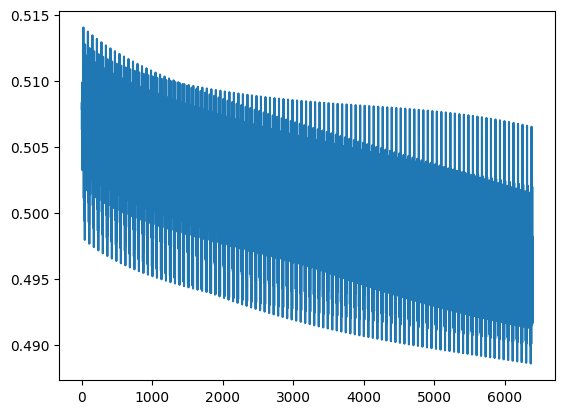

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 1).mean(1))

In [ ]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
  layer.training = False

In [ ]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  logits = model(x)

  logits_flat = logits.view(-1, logits.size(-1))  # Flatten logits to [batch_size*10, 81]
  y_flat = y.unsqueeze(1).repeat(1, 10).view(-1)  # Repeat y to match logits and flatten

  loss = F.cross_entropy(logits_flat, y_flat.long() - 1)  # Calculate cross entropy loss

  print(split, loss.item())

split_loss('train')
split_loss('val')

train 3.176901340484619
val 3.2275302410125732


In [ ]:
from collections import OrderedDict

number = 0
# sample from the model
for _ in range(3):

    out = OrderedDict() # Use OrderedDict to preserve order and avoid repetition
    #context = [0] * block_size # initialize with all ...
    Xb, Yb = Xtr[(number)*batch_size : (number+1)*batch_size], Ytr[(number+1)*batch_size : (number+1)*batch_size]
    # forward pass the neural net
    #logits = model(torch.tensor([context]))
    logits = model(Xb)
    # --- BEGIN CHANGES ---
    # Reshape logits to 2D before applying softmax
    logits_2d = logits.view(-1, logits.size(-1))
    probs = F.softmax(logits_2d, dim=1)
    # Sample one index for each row in probs
    ix = torch.multinomial(probs, num_samples=1) # ix will now be a [800, 1] tensor
    ix = ix.squeeze().tolist() # Convert to a list of 800 integers
    # --- END CHANGES ---
    # shift the context window and track the samples
    #context = context[1:] + [ix] # You'll need to adjust how you use context here

    # Add new values ​​to out so that order is preserved and not repeated
    for i in ix:
        out[i] = None

    # If the number of numbers was less than 80, fill the list until it reaches 80
    while len(out) < 80:
        additional_ix = torch.multinomial(probs, num_samples=1).squeeze().tolist()
        for i in additional_ix:
            if len(out) >= 80:
                break
            out[i] = None

   # Print the output in 8 columns and 10 lines
    out_list = list(out.keys())[:80]
    for row in range(10):
        print(' '.join('{:>2}'.format(out_list[col + row*8]) for col in range(8)))

    number += 1
    print("-"*100)


13 12 47  0 17 30 25 76
68 32 29 72 44 19 79 20
10 58 69 52 57 14 71  9
21 22 15 37 78 56  3 59
34 46 35 45  5 23 64 61
48  7  6 42 50 53 62 18
67 77 33 38  1 73  8 55
27 31 24 70 74 66 11 36
40 54 28  2 63 41 16 65
26 60 51 39  4 49 75 43
----------------------------------------------------------------------------------------------------
27 30 79 59 49 44  1 70
68 33 24 76 64 45 13 32
 3 10 47 69 73 63 22 37
20 41 74 71  2 40 28 72
75  4 48 15  6 42 62 14
 9 23  5  0 35 29 58 53
56 21 34 38 43 77 67 61
 8 54 60 17 25 50 31 46
78  7 19 12 16 52 36 65
39 55 18 66 26 51 57 11
----------------------------------------------------------------------------------------------------
55 65 22 70  4 52 50 16
49  2 26 54 42 43  0 66
 3 18  6 28 15 36 57 69
40 74 30 56 78 61 77 13
20 58 45 10 32 35 12 44
73  1 63 76 46 51 27  8
48 31 67 47 68 38  9 71
72 59  5 33 21 75 53 11
79 24 37 14  7 34 39 23
62 17 64 29 41 19 25 80
------------------------------------------------------------------------------

In [ ]:
x_str = ''.join(str(ix.item()) for ix in x)
y_str = str(y.item())

In [ ]:
for x,y in zip(Xtr[0:80], Ytr[0:80]):
  print(''.join(str(ix.item()) for ix in x), '-->', y.item()) # Convert tensor elements to strings before joining

00000000000000000000000000000000000000000000000000000000000000000000000000000000 --> 50
000000000000000000000000000000000000000000000000000000000000000000000000000000050 --> 56
0000000000000000000000000000000000000000000000000000000000000000000000000000005056 --> 58
00000000000000000000000000000000000000000000000000000000000000000000000000000505658 --> 59
000000000000000000000000000000000000000000000000000000000000000000000000000050565859 --> 64
0000000000000000000000000000000000000000000000000000000000000000000000000005056585964 --> 70
00000000000000000000000000000000000000000000000000000000000000000000000000505658596470 --> 75
000000000000000000000000000000000000000000000000000000000000000000000000050565859647075 --> 77
0000000000000000000000000000000000000000000000000000000000000000000000005056585964707577 --> 2
0000000000000000000000000000000000000000000000000000000000000000000000050565859647075772 --> 30
00000000000000000000000000000000000000000000000000000000000000000000005056585